# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1

Use the Monte Carlo NVT code we have provided to print out instantaneous values of potential energy per particle, $U/N$, and pressure, $P$, along **equilibrated** Monte Carlo simulations (of  $M=10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ and $P$ to obtain the Monte Carlo correlation time</span> via a fit with an exponential function. This will suggest you how large should be the blocks in your simulations.

In [ ]:
# WARNING: This may take a while! #CoffeeTime
!./simulate.sh

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def autocorrelation(data, tau):
    
    tau = int(tau)
    
    if tau == 1:
        return 1;
    
    size = data.size
    
    cave = 0;
    
    ave = 0
    tave = 0
    
    ave2 = 0
    
    for i in range(size-tau):
        cave += data[i]*data[i+tau]
        tave += data[i+tau]
        
    cave = cave/(size-tau)
    tave = tave/(size-tau)
    
    for i in range(size):
        ave += data[i]
        ave2 += data[i]**2
    ave2 = ave2/size
    ave = ave/size
    
    sigma2 = ave2 - ave**2;
    
    corr = (cave - ave*tave)/sigma2
    
    return corr;

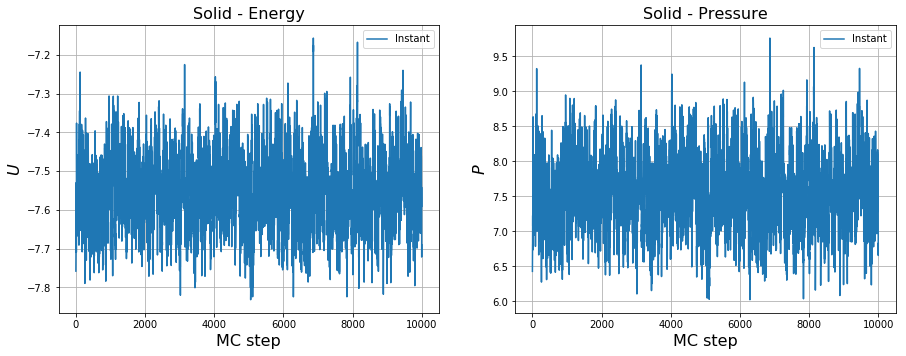

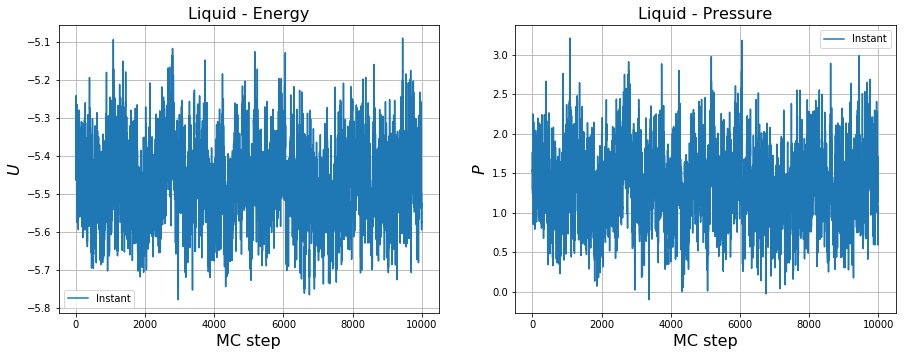

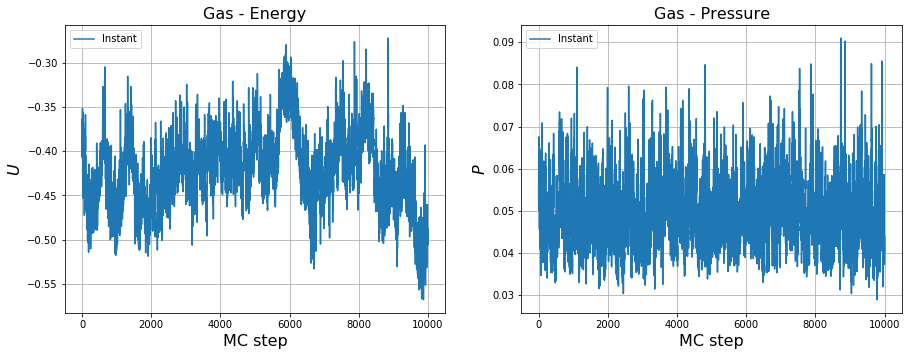

In [3]:
# SOLID

step, u_inst_solid = np.loadtxt("sim_data/solid/output.inst_epot.0", unpack='true')
step_solid, p_inst_solid = np.loadtxt("sim_data/solid/output.inst_pres.0", unpack='true')

fig = plt.figure(figsize=[15,18])

plt.subplot(3,2,1)
plt.plot(step, u_inst_solid, label = "Instant")
plt.title("Solid - Energy", fontsize = 16)
plt.ylabel('$U$', fontsize = 16)
plt.xlabel('MC step', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(3,2,2)
plt.plot(step, p_inst_solid, label = "Instant")
plt.title("Solid - Pressure", fontsize = 16)
plt.ylabel('$P$', fontsize = 16)
plt.xlabel('MC step', fontsize = 16)
plt.legend()
plt.grid(True)

# LIQUID

step, u_inst_liquid = np.loadtxt("sim_data/liquid/output.inst_epot.0", unpack='true')
step_liquid, p_inst_liquid = np.loadtxt("sim_data/liquid/output.inst_pres.0", unpack='true')

fig = plt.figure(figsize=[15,18])

plt.subplot(3,2,1)
plt.plot(step, u_inst_liquid, label = "Instant")
plt.title("Liquid - Energy", fontsize = 16)
plt.ylabel('$U$', fontsize = 16)
plt.xlabel('MC step', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(3,2,2)
plt.plot(step, p_inst_liquid, label = "Instant")
plt.title("Liquid - Pressure", fontsize = 16)
plt.ylabel('$P$', fontsize = 16)
plt.xlabel('MC step', fontsize = 16)
plt.legend()
plt.grid(True)

# GAS

step, u_inst_gas = np.loadtxt("sim_data/gas/output.inst_epot.0", unpack='true')
step_gas, p_inst_gas = np.loadtxt("sim_data/gas/output.inst_pres.0", unpack='true')

fig = plt.figure(figsize=[15,18])

plt.subplot(3,2,1)
plt.plot(step, u_inst_gas, label = "Instant")
plt.title("Gas - Energy", fontsize = 16)
plt.ylabel('$U$', fontsize = 16)
plt.xlabel('MC step', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(3,2,2)
plt.plot(step, p_inst_gas, label = "Instant")
plt.title("Gas - Pressure", fontsize = 16)
plt.ylabel('$P$', fontsize = 16)
plt.xlabel('MC step', fontsize = 16)
plt.legend()
plt.grid(True)

plt.show()

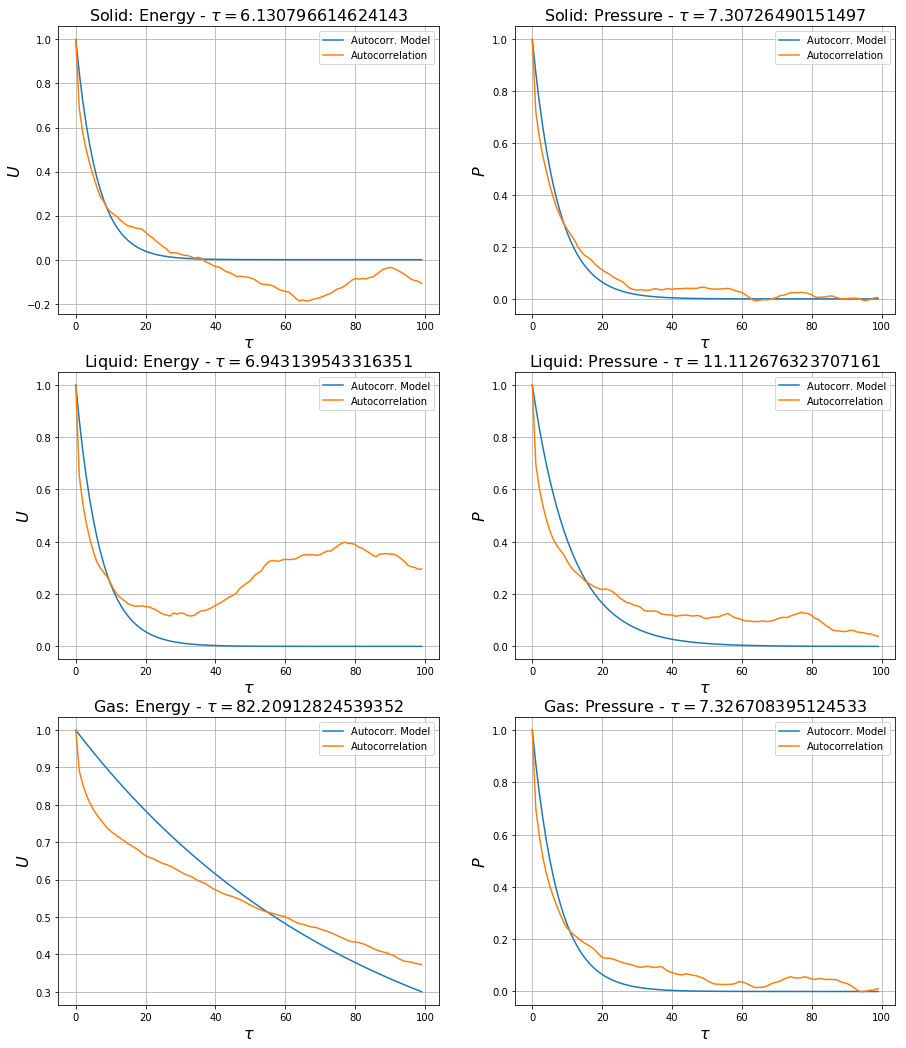

In [4]:
def corr_model(tau, tau_c):
    return np.exp(-tau/tau_c)

x = np.arange(100)

fig = plt.figure(figsize=[15,18])

# SOLID
corr_u = []
corr_p = []

for i in x:
    corr_u.append(autocorrelation(u_inst_solid, i+1))
    corr_p.append(autocorrelation(p_inst_solid, i+1))
    
corr_u = np.array(corr_u)
corr_p = np.array(corr_p)

popt_u, pcov_u = curve_fit(corr_model, x, corr_u)
popt_p, pcov_p = curve_fit(corr_model, x, corr_p)

model_u = corr_model(x, popt_u[0])
model_p = corr_model(x, popt_p[0])


plt.subplot(3,2,1)
plt.plot(x, model_u, label = "Autocorr. Model")
plt.plot(x, corr_u, label = "Autocorrelation")
plt.title("Solid: Energy - $\\tau=$"+str(popt_u[0]), fontsize = 16)
plt.ylabel('$U$', fontsize = 16)
plt.xlabel('$\\tau$', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(3,2,2)
plt.plot(x, model_p, label = "Autocorr. Model")
plt.plot(x, corr_p, label = "Autocorrelation")
plt.title("Solid: Pressure - $\\tau=$" + str(popt_p[0]), fontsize = 16)
plt.ylabel('$P$', fontsize = 16)
plt.xlabel('$\\tau$', fontsize = 16)
plt.legend()
plt.grid(True)

# LIQUID
corr_u = []
corr_p = []

for i in x:
    corr_u.append(autocorrelation(u_inst_liquid, i+1))
    corr_p.append(autocorrelation(p_inst_liquid, i+1))
    
corr_u = np.array(corr_u)
corr_p = np.array(corr_p)

popt_u, pcov_u = curve_fit(corr_model, x, corr_u)
popt_p, pcov_p = curve_fit(corr_model, x, corr_p)

model_u = corr_model(x, popt_u[0])
model_p = corr_model(x, popt_p[0])


plt.subplot(3,2,3)
plt.plot(x, model_u, label = "Autocorr. Model")
plt.plot(x, corr_u, label = "Autocorrelation")
plt.title("Liquid: Energy - $\\tau=$"+str(popt_u[0]), fontsize = 16)
plt.ylabel('$U$', fontsize = 16)
plt.xlabel('$\\tau$', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(3,2,4)
plt.plot(x, model_p, label = "Autocorr. Model")
plt.plot(x, corr_p, label = "Autocorrelation")
plt.title("Liquid: Pressure - $\\tau=$" + str(popt_p[0]), fontsize = 16)
plt.ylabel('$P$', fontsize = 16)
plt.xlabel('$\\tau$', fontsize = 16)
plt.legend()
plt.grid(True)

# GAS
corr_u = []
corr_p = []

for i in x:
    corr_u.append(autocorrelation(u_inst_gas, i+1))
    corr_p.append(autocorrelation(p_inst_gas, i+1))
    
corr_u = np.array(corr_u)
corr_p = np.array(corr_p)

popt_u, pcov_u = curve_fit(corr_model, x, corr_u)
popt_p, pcov_p = curve_fit(corr_model, x, corr_p)

model_u = corr_model(x, popt_u[0])
model_p = corr_model(x, popt_p[0])


plt.subplot(3,2,5)
plt.plot(x, model_u, label = "Autocorr. Model")
plt.plot(x, corr_u, label = "Autocorrelation")
plt.title("Gas: Energy - $\\tau=$"+str(popt_u[0]), fontsize = 16)
plt.ylabel('$U$', fontsize = 16)
plt.xlabel('$\\tau$', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(3,2,6)
plt.plot(x, model_p, label = "Autocorr. Model")
plt.plot(x, corr_p, label = "Autocorrelation")
plt.title("Gas: Pressure - $\\tau=$" + str(popt_p[0]), fontsize = 16)
plt.ylabel('$P$', fontsize = 16)
plt.xlabel('$\\tau$', fontsize = 16)
plt.legend()
plt.grid(True)

plt.show();

2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ and $P$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

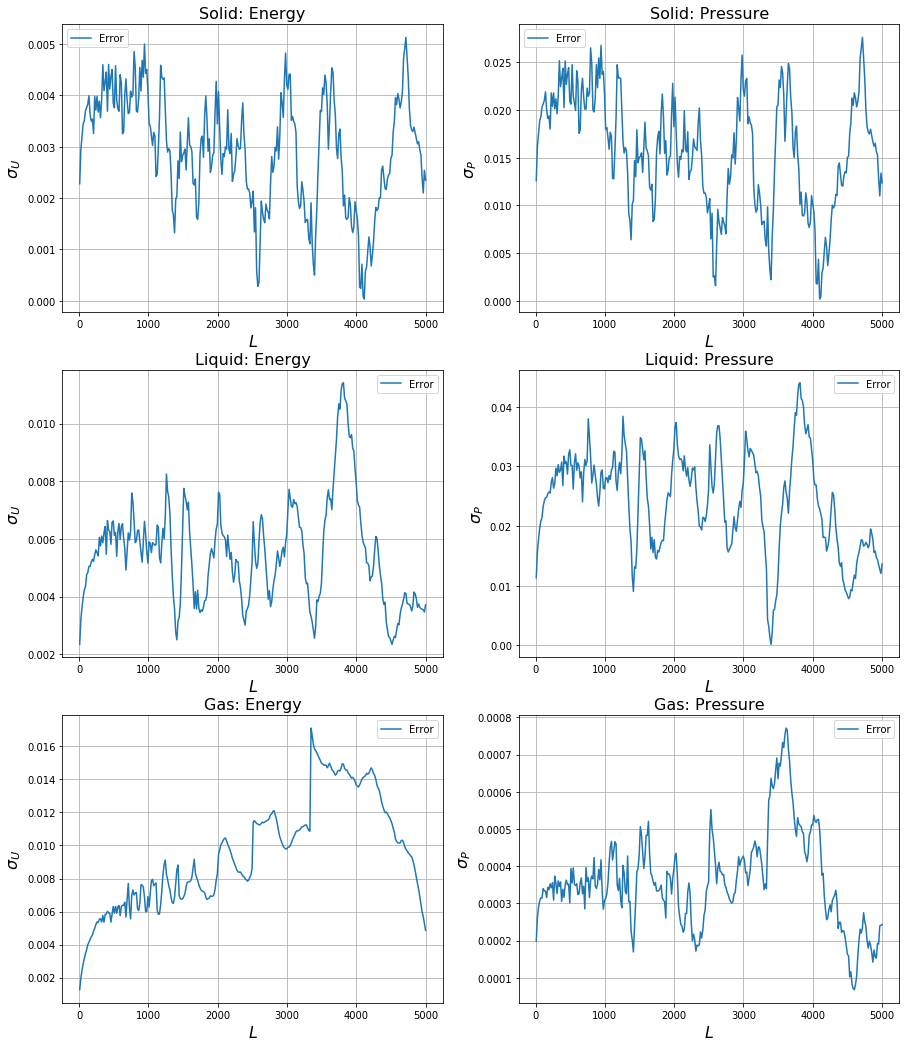

In [5]:
def error(ave, ave2, n):
    if n == 0:
        return 0
    else:
        return np.sqrt((ave2 - ave*ave)/n);

def data_blocking(data, L):
    
    L = int(L)
    M = data.size
    N = int(M/L)
    
    ave = np.zeros(N)
    
    for i in range(N):
        for j in range(L):
            k = i*L+j
            ave[i] += data[k]
        ave[i] = ave[i]/L
    
    sum_prog = np.zeros(N)
    su2_prog = np.zeros(N)
    err_prog = np.zeros(N)
    
    for i in range(N):
        for j in range(i+1):
            sum_prog[i] += ave[j]
            su2_prog[i] += ave[j]**2
        sum_prog[i] = sum_prog[i]/(i+1)
        su2_prog[i] = su2_prog[i]/(i+1)
        err_prog[i] = error(sum_prog[i], su2_prog[i], i)
    
    return err_prog[-1]


x = np.linspace(10, 5e3, 300)

fig = plt.figure(figsize=[15,18])

# SOLID
sigma_u = []
sigma_p = []

for i in x:
    sigma_u.append(data_blocking(u_inst_solid, i))
    sigma_p.append(data_blocking(p_inst_solid, i))
    
sigma_u = np.array(sigma_u)
sigma_p = np.array(sigma_p)

plt.subplot(3,2,1)
plt.plot(x, sigma_u, label = "Error")
plt.title("Solid: Energy", fontsize = 16)
plt.ylabel('$\\sigma_U$', fontsize = 16)
plt.xlabel('$L$', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(3,2,2)
plt.plot(x, sigma_p, label = "Error")
plt.title("Solid: Pressure", fontsize = 16)
plt.ylabel('$\\sigma_P$', fontsize = 16)
plt.xlabel('$L$', fontsize = 16)
plt.legend()
plt.grid(True)

# LIQUID
sigma_u = []
sigma_p = []

for i in x:
    sigma_u.append(data_blocking(u_inst_liquid, i))
    sigma_p.append(data_blocking(p_inst_liquid, i))
    
sigma_u = np.array(sigma_u)
sigma_p = np.array(sigma_p)

plt.subplot(3,2,3)
plt.plot(x, sigma_u, label = "Error")
plt.title("Liquid: Energy", fontsize = 16)
plt.ylabel('$\\sigma_U$', fontsize = 16)
plt.xlabel('$L$', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(3,2,4)
plt.plot(x, sigma_p, label = "Error")
plt.title("Liquid: Pressure", fontsize = 16)
plt.ylabel('$\\sigma_P$', fontsize = 16)
plt.xlabel('$L$', fontsize = 16)
plt.legend()
plt.grid(True)


# GAS
sigma_u = []
sigma_p = []

for i in x:
    sigma_u.append(data_blocking(u_inst_gas, i))
    sigma_p.append(data_blocking(p_inst_gas, i))
    
sigma_u = np.array(sigma_u)
sigma_p = np.array(sigma_p)

plt.subplot(3,2,5)
plt.plot(x, sigma_u, label = "Error")
plt.title("Gas: Energy", fontsize = 16)
plt.ylabel('$\\sigma_U$', fontsize = 16)
plt.xlabel('$L$', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(3,2,6)
plt.plot(x, sigma_p, label = "Error")
plt.title("Gas: Pressure", fontsize = 16)
plt.ylabel('$\\sigma_P$', fontsize = 16)
plt.xlabel('$L$', fontsize = 16)
plt.legend()
plt.grid(True)


plt.show();

### Exercise 07.2

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the Monte Carlo NVT code</span> we have provided: average value of $g(r)$ in each block (with output in the file: output.gofr.0), final average value of $g(r)$ with statistical uncertainties (with output in the file: output.gave.0).

[DONE] - All results in the same file: output.gofr.0

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, inside the previously used Molecular Dynamics code</span>.

### Exercise 07.4

By means of your upgraded MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) and Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

<span style="color:red">Show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in SI units ... and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

In [8]:
# WARNING: This may take a while! #CoffeeTime
!./simulate_classic.sh

Launching instance of the simulation with the Verlet algorithm...

Cleaning stuff up...

rm *.o *.exe

Compiling...

g++ -c esercizio4.cpp -o esercizio4.o -Wall -O3 --std=c++11
g++ -c random.cpp -o random.o -Wall -O3 --std=c++11
g++ esercizio4.o random.o  -o esercizio4.exe

Starting Simulation Process...

------------------------------------------------------

Starting SOLID simulation:

 ### Equilibration phase ### 

Temperature = 0.8
Number of particles = 108
Density of particles = 1.1
Volume of the simulation box = 98.1818
Edge of the simulation box = 4.61329
Time step = 0.0005
Number of steps = 10000
Starting simulation from zero...

Read initial configuration from file config.0 

Prepare random velocities with center of mass velocity equal to zero 

Number of time-steps: 1000
Number of time-steps: 2000
Number of time-steps: 3000
Number of time-steps: 4000
Number of time-steps: 5000
Number of time-steps: 6000
Number of time-steps: 7000
Number of time-steps: 8000
Number of time-step

In [21]:
# Or just import the data...
!./import_classic.sh

Copying the data files...


DONE!

Please, continue your I-Python notebook activity.


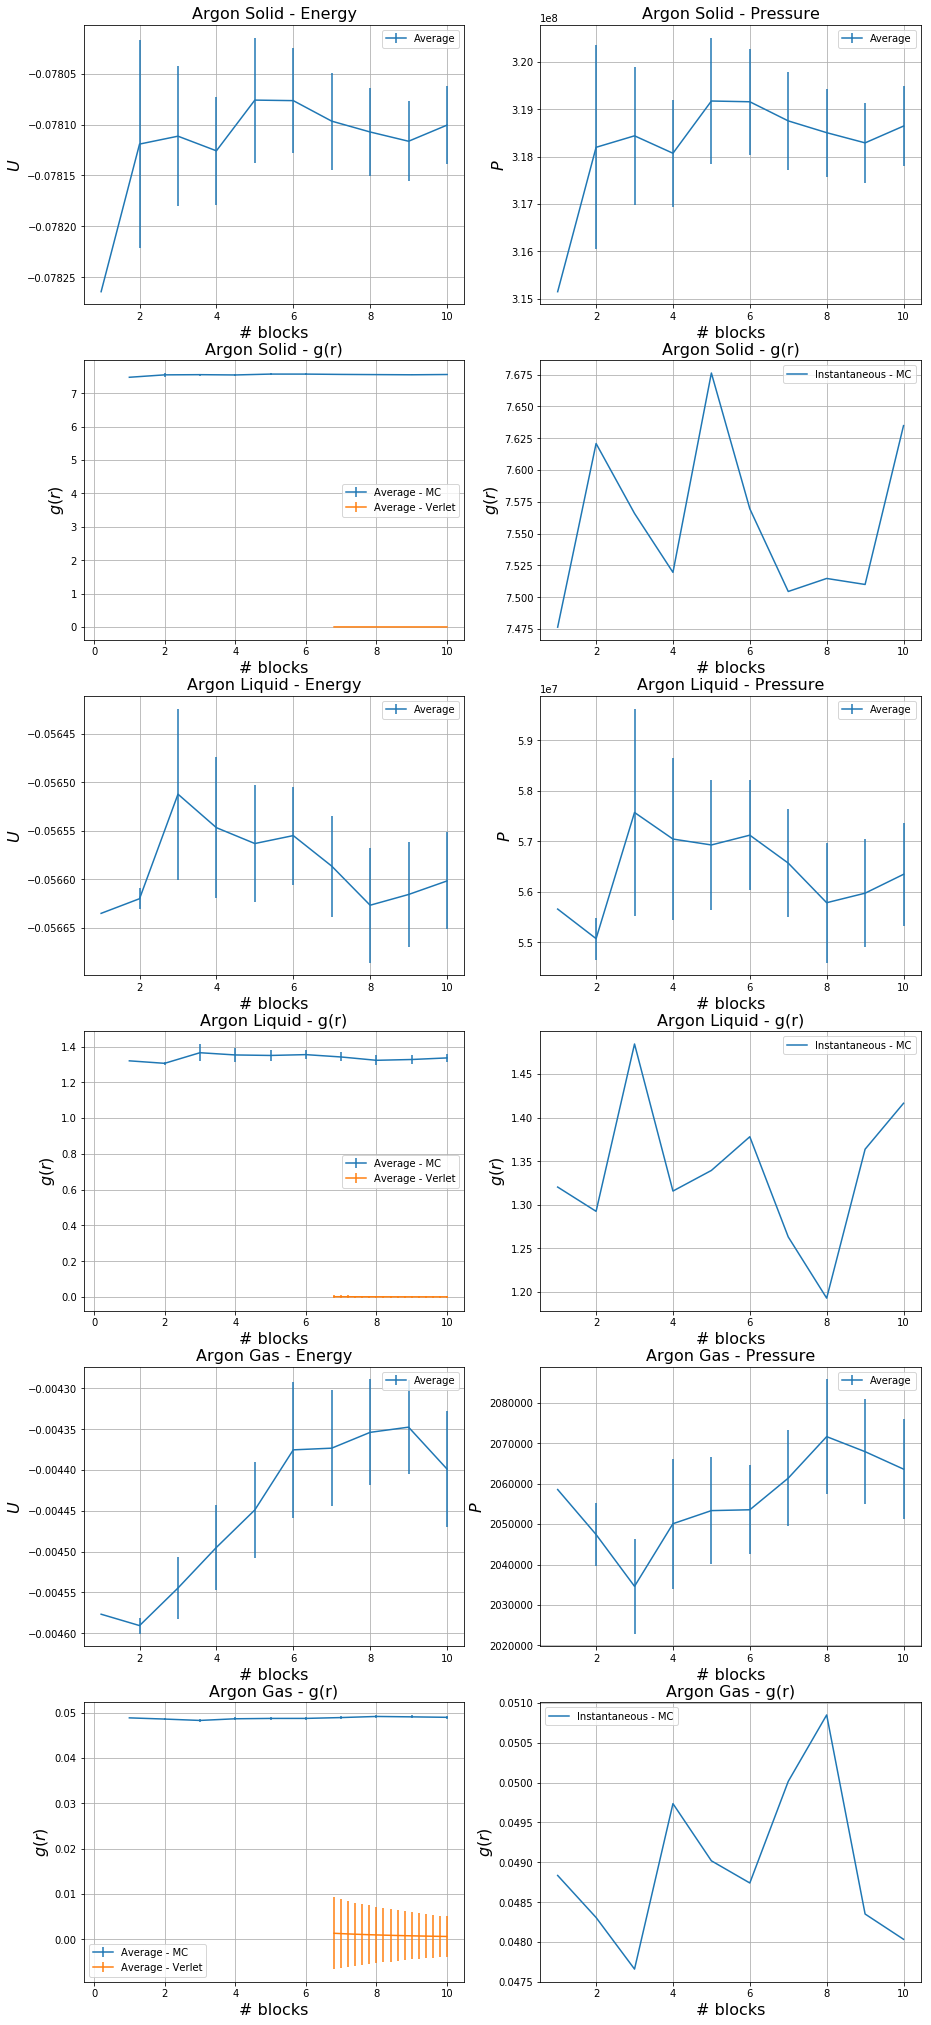

In [34]:
# ARGON

kb = 1.38065e-23
ev = 1.60217e-19

sigma = 0.34 # nm
e_kb = 120   # K
m = 39.948   # amu

fu = e_kb*kb/ev              # LJ to eV
fk = fu                      # LJ to K
fv = fu                      # LJ to eV
ft = e_kb                    # LJ to eV
fp = e_kb*kb/(sigma*1e-9)**3 # LJ to Pa

fig = plt.figure(figsize=[15,36])

# SOLID #######################################################

block, u_inst, u_ave, u_error = np.loadtxt("sim_data/solid/output.epot.0", unpack='true')
block, p_inst, p_ave, p_error = np.loadtxt("sim_data/solid/output.pres.0", unpack='true')
block, g_inst, g_ave, g_error = np.loadtxt("sim_data/solid/output.gofr.0", unpack='true')
vblock, gv_ave, gv_error = np.loadtxt("sim_data/gas/output.gofr-verlet.0", unpack='true', delimiter=",", skiprows=1)

u_inst, u_ave, u_error = fu*u_inst, fu*u_ave, fu*u_error
p_inst, p_ave, p_error = fp*p_inst, fp*p_ave, fp*p_error
vblock/= 5

plt.subplot(6,2,1)
plt.errorbar(block,u_ave,yerr=u_error, label = "Average")
plt.title("Argon Solid - Energy", fontsize = 16)
plt.ylabel('$U$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(6,2,2)
plt.errorbar(block,p_ave,yerr=p_error, label = "Average")
plt.title("Argon Solid - Pressure", fontsize = 16)
plt.ylabel('$P$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(6,2,3)
plt.errorbar(block,g_ave,yerr=g_error, label = "Average - MC")
plt.errorbar(vblock,gv_ave,yerr=gv_error, label = "Average - Verlet")
plt.title("Argon Solid - g(r)", fontsize = 16)
plt.ylabel('$g(r)$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(6,2,4)
plt.plot(block,g_inst, label = "Instantaneous - MC")
plt.title("Argon Solid - g(r)", fontsize = 16)
plt.ylabel('$g(r)$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

# LIQUID #############################################################################

block, u_inst, u_ave, u_error = np.loadtxt("sim_data/liquid/output.epot.0", unpack='true')
block, p_inst, p_ave, p_error = np.loadtxt("sim_data/liquid/output.pres.0", unpack='true')
block, g_inst, g_ave, g_error = np.loadtxt("sim_data/liquid/output.gofr.0", unpack='true')
vblock, gv_ave, gv_error = np.loadtxt("sim_data/gas/output.gofr-verlet.0", unpack='true', delimiter=",", skiprows=1)

u_inst, u_ave, u_error = fu*u_inst, fu*u_ave, fu*u_error
p_inst, p_ave, p_error = fp*p_inst, fp*p_ave, fp*p_error
vblock/= 5

plt.subplot(6,2,5)
plt.errorbar(block,u_ave,yerr=u_error, label = "Average")
plt.title("Argon Liquid - Energy", fontsize = 16)
plt.ylabel('$U$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(6,2,6)
plt.errorbar(block,p_ave,yerr=p_error, label = "Average")
plt.title("Argon Liquid - Pressure", fontsize = 16)
plt.ylabel('$P$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(6,2,7)
plt.errorbar(block,g_ave,yerr=g_error, label = "Average - MC")
plt.errorbar(vblock,gv_ave,yerr=gv_error, label = "Average - Verlet")
plt.title("Argon Liquid - g(r)", fontsize = 16)
plt.ylabel('$g(r)$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(6,2,8)
plt.plot(block,g_inst, label = "Instantaneous - MC")
plt.title("Argon Liquid - g(r)", fontsize = 16)
plt.ylabel('$g(r)$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)


# GAS ##################################################################################3

block, u_inst, u_ave, u_error = np.loadtxt("sim_data/gas/output.epot.0", unpack='true')
block, p_inst, p_ave, p_error = np.loadtxt("sim_data/gas/output.pres.0", unpack='true')
block, g_inst, g_ave, g_error = np.loadtxt("sim_data/gas/output.gofr.0", unpack='true')
vblock, gv_ave, gv_error = np.loadtxt("sim_data/gas/output.gofr-verlet.0", unpack='true', delimiter=",", skiprows=1)

u_inst, u_ave, u_error = fu*u_inst, fu*u_ave, fu*u_error
p_inst, p_ave, p_error = fp*p_inst, fp*p_ave, fp*p_error
vblock/= 5

plt.subplot(6,2,9)
plt.errorbar(block,u_ave,yerr=u_error, label = "Average")
plt.title("Argon Gas - Energy", fontsize = 16)
plt.ylabel('$U$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(6,2,10)
plt.errorbar(block,p_ave,yerr=p_error, label = "Average")
plt.title("Argon Gas - Pressure", fontsize = 16)
plt.ylabel('$P$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(6,2,11)
plt.errorbar(block,g_ave,yerr=g_error, label = "Average - MC")
plt.errorbar(vblock,gv_ave,yerr=gv_error, label = "Average - Verlet")
plt.title("Argon Gas - g(r)", fontsize = 16)
plt.ylabel('$g(r)$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(6,2,12)
plt.plot(block,g_inst, label = "Instantaneous - MC")
plt.title("Argon Gas - g(r)", fontsize = 16)
plt.ylabel('$g(r)$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.show()

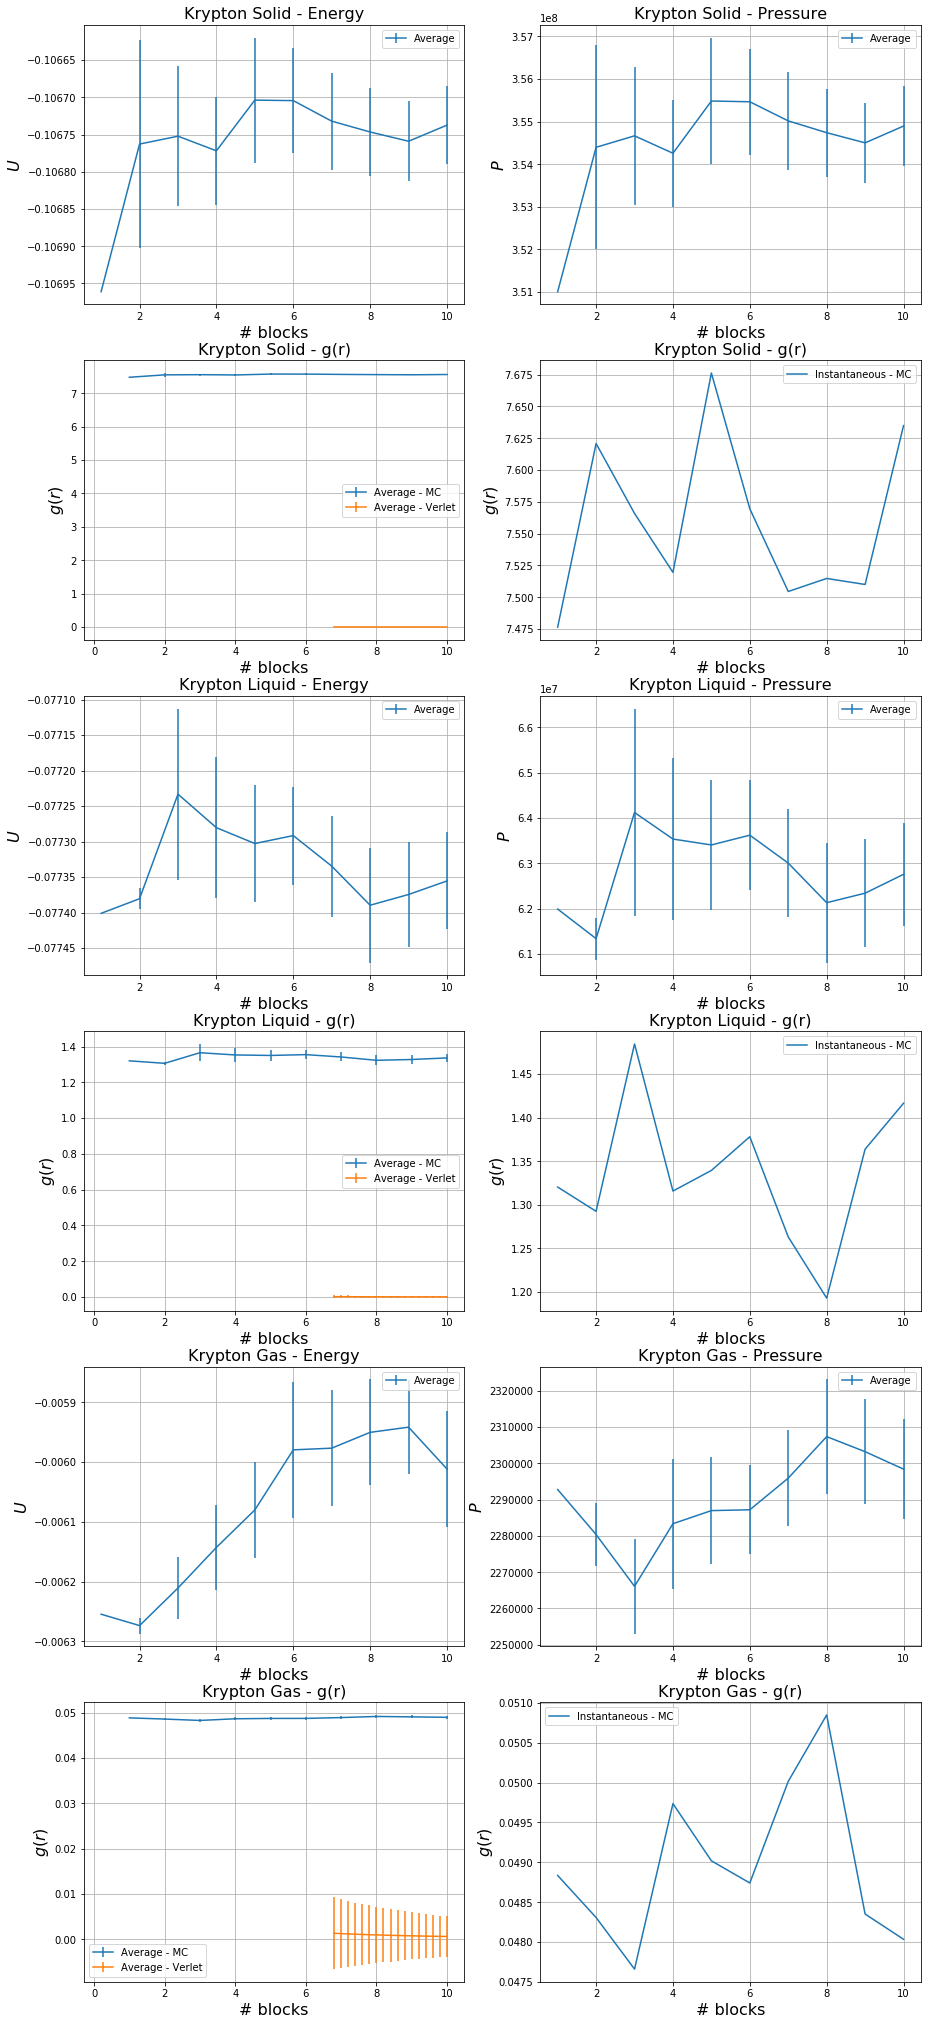

In [35]:
# KRYPTON

kb = 1.38065e-23
ev = 1.60217e-19

sigma = 0.364 # nm
e_kb = 164   # K
m = 83.798   # amu

fu = e_kb*kb/ev              # LJ to eV
fk = fu                      # LJ to K
fv = fu                      # LJ to eV
ft = e_kb                    # LJ to eV
fp = e_kb*kb/(sigma*1e-9)**3 # LJ to Pa

fig = plt.figure(figsize=[15,36])

# SOLID #######################################################

block, u_inst, u_ave, u_error = np.loadtxt("sim_data/solid/output.epot.0", unpack='true')
block, p_inst, p_ave, p_error = np.loadtxt("sim_data/solid/output.pres.0", unpack='true')
block, g_inst, g_ave, g_error = np.loadtxt("sim_data/solid/output.gofr.0", unpack='true')
vblock, gv_ave, gv_error = np.loadtxt("sim_data/gas/output.gofr-verlet.0", unpack='true', delimiter=",", skiprows=1)

u_inst, u_ave, u_error = fu*u_inst, fu*u_ave, fu*u_error
p_inst, p_ave, p_error = fp*p_inst, fp*p_ave, fp*p_error
vblock/= 5

plt.subplot(6,2,1)
plt.errorbar(block,u_ave,yerr=u_error, label = "Average")
plt.title("Krypton Solid - Energy", fontsize = 16)
plt.ylabel('$U$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(6,2,2)
plt.errorbar(block,p_ave,yerr=p_error, label = "Average")
plt.title("Krypton Solid - Pressure", fontsize = 16)
plt.ylabel('$P$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(6,2,3)
plt.errorbar(block,g_ave,yerr=g_error, label = "Average - MC")
plt.errorbar(vblock,gv_ave,yerr=gv_error, label = "Average - Verlet")
plt.title("Krypton Solid - g(r)", fontsize = 16)
plt.ylabel('$g(r)$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(6,2,4)
plt.plot(block,g_inst, label = "Instantaneous - MC")
plt.title("Krypton Solid - g(r)", fontsize = 16)
plt.ylabel('$g(r)$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

# LIQUID #############################################################################

block, u_inst, u_ave, u_error = np.loadtxt("sim_data/liquid/output.epot.0", unpack='true')
block, p_inst, p_ave, p_error = np.loadtxt("sim_data/liquid/output.pres.0", unpack='true')
block, g_inst, g_ave, g_error = np.loadtxt("sim_data/liquid/output.gofr.0", unpack='true')
vblock, gv_ave, gv_error = np.loadtxt("sim_data/gas/output.gofr-verlet.0", unpack='true', delimiter=",", skiprows=1)

u_inst, u_ave, u_error = fu*u_inst, fu*u_ave, fu*u_error
p_inst, p_ave, p_error = fp*p_inst, fp*p_ave, fp*p_error
vblock/= 5

plt.subplot(6,2,5)
plt.errorbar(block,u_ave,yerr=u_error, label = "Average")
plt.title("Krypton Liquid - Energy", fontsize = 16)
plt.ylabel('$U$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(6,2,6)
plt.errorbar(block,p_ave,yerr=p_error, label = "Average")
plt.title("Krypton Liquid - Pressure", fontsize = 16)
plt.ylabel('$P$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(6,2,7)
plt.errorbar(block,g_ave,yerr=g_error, label = "Average - MC")
plt.errorbar(vblock,gv_ave,yerr=gv_error, label = "Average - Verlet")
plt.title("Krypton Liquid - g(r)", fontsize = 16)
plt.ylabel('$g(r)$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(6,2,8)
plt.plot(block,g_inst, label = "Instantaneous - MC")
plt.title("Krypton Liquid - g(r)", fontsize = 16)
plt.ylabel('$g(r)$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)


# GAS ##################################################################################3

block, u_inst, u_ave, u_error = np.loadtxt("sim_data/gas/output.epot.0", unpack='true')
block, p_inst, p_ave, p_error = np.loadtxt("sim_data/gas/output.pres.0", unpack='true')
block, g_inst, g_ave, g_error = np.loadtxt("sim_data/gas/output.gofr.0", unpack='true')
vblock, gv_ave, gv_error = np.loadtxt("sim_data/gas/output.gofr-verlet.0", unpack='true', delimiter=",", skiprows=1)

u_inst, u_ave, u_error = fu*u_inst, fu*u_ave, fu*u_error
p_inst, p_ave, p_error = fp*p_inst, fp*p_ave, fp*p_error
vblock/= 5

plt.subplot(6,2,9)
plt.errorbar(block,u_ave,yerr=u_error, label = "Average")
plt.title("Krypton Gas - Energy", fontsize = 16)
plt.ylabel('$U$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(6,2,10)
plt.errorbar(block,p_ave,yerr=p_error, label = "Average")
plt.title("Krypton Gas - Pressure", fontsize = 16)
plt.ylabel('$P$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(6,2,11)
plt.errorbar(block,g_ave,yerr=g_error, label = "Average - MC")
plt.errorbar(vblock,gv_ave,yerr=gv_error, label = "Average - Verlet")
plt.title("Krypton Gas - g(r)", fontsize = 16)
plt.ylabel('$g(r)$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.subplot(6,2,12)
plt.plot(block,g_inst, label = "Instantaneous - MC")
plt.title("Krypton Gas - g(r)", fontsize = 16)
plt.ylabel('$g(r)$', fontsize = 16)
plt.xlabel('# blocks', fontsize = 16)
plt.legend()
plt.grid(True)

plt.show()